In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
data=pd.read_csv("C:/Users/User/Desktop/odi.csv")
#load the data 

In [12]:
data.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,0,0,0.1,0,0,0,0,301
1,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,0,0,0.2,0,0,0,0,301
2,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,4,0,0.3,4,0,0,0,301
3,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,6,0,0.4,6,0,0,0,301
4,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,6,0,0.5,6,0,0,0,301


In [13]:
data.shape

(350899, 15)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350899 entries, 0 to 350898
Data columns (total 15 columns):
mid               350899 non-null int64
date              350899 non-null object
venue             350899 non-null object
bat_team          350899 non-null object
bowl_team         350899 non-null object
batsman           350899 non-null object
bowler            350899 non-null object
runs              350899 non-null int64
wickets           350899 non-null int64
overs             350899 non-null float64
runs_last_5       350899 non-null int64
wickets_last_5    350899 non-null int64
striker           350899 non-null int64
non-striker       350899 non-null int64
total             350899 non-null int64
dtypes: float64(1), int64(8), object(6)
memory usage: 40.2+ MB


In [15]:
data.describe()

,mid,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
count,350899.000000,350899.000000,350899.000000,350899.000000,350899.000000,350899.000000,350899.000000,350899.000000,350899.000000
mean,594.360426,114.801661,2.974970,24.052899,23.548303,0.669814,35.180129,12.427944,255.355387
std,343.605128,77.665959,2.298959,14.235439,11.042974,0.833895,28.115264,15.019181,62.354412
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,44.000000
25%,296.000000,51.000000,1.000000,11.600000,17.000000,0.000000,13.000000,2.000000,217.000000
50%,596.000000,105.000000,3.000000,23.600000,23.000000,0.000000,29.000000,7.000000,257.000000
75%,893.000000,168.000000,4.000000,36.200000,29.000000,1.000000,50.000000,18.000000,298.000000
max,1188.000000,444.000000,10.000000,49.600000,101.000000,7.000000,264.000000,149.000000,444.000000


#  Preparing the data:

In [16]:
data.duplicated().sum() 
# no dulpicate value is present 

0

### Checking Missing/null values:

In [34]:
data.isnull().sum()

mid               0
date              0
venue             0
bat_team          0
bowl_team         0
batsman           0
bowler            0
runs              0
wickets           0
overs             0
runs_last_5       0
wickets_last_5    0
striker           0
non-striker       0
total             0
dtype: int64

In [35]:
data.isnull().any().any()

False

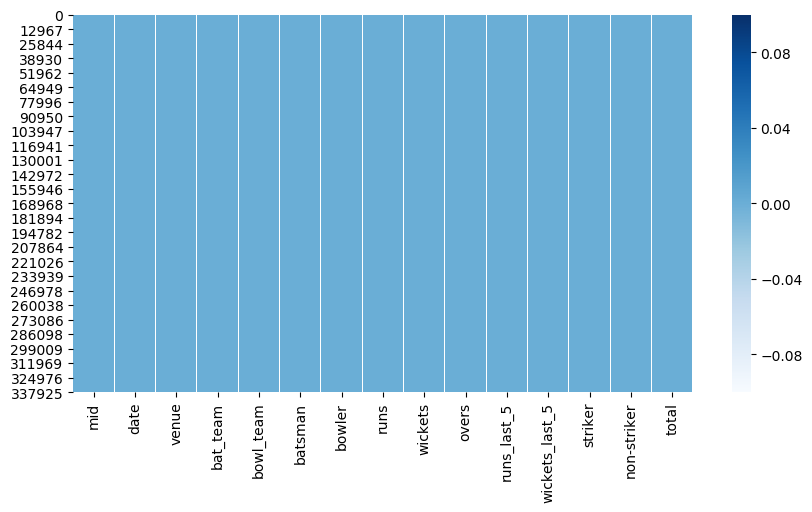

In [36]:
plt.figure(figsize=(10,5),dpi=100)
sns.heatmap(data.isnull(),cmap='Blues')

### **Detecting outilers**

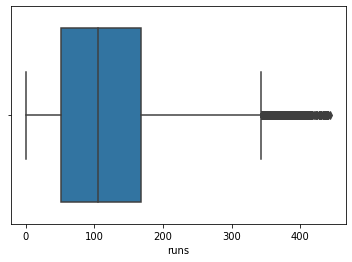

In [17]:
sns.boxplot(data["runs"])

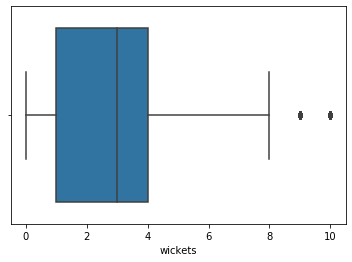

In [18]:
sns.boxplot(data["wickets"])

In [19]:
index=data[data["wickets"]>8].index
# we see that the outlier in above plot so we can remove wickects greater than 8

In [20]:
data.drop(index,inplace=True,axis=0)

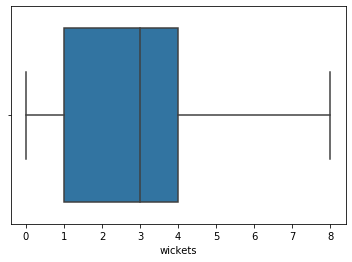

In [21]:
sns.boxplot(data["wickets"])

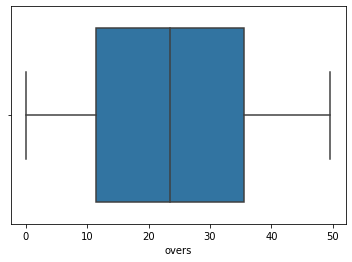

In [22]:
sns.boxplot(data["overs"])

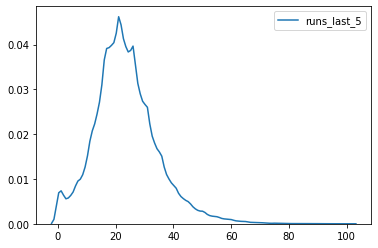

In [23]:
sns.kdeplot(data["runs_last_5"])

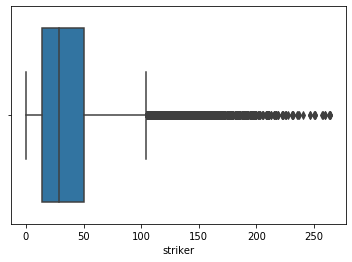

In [24]:
sns.boxplot(data["striker"])

In [25]:
index=index=data[data["striker"]>230].index
data.drop(index,inplace=True,axis=0)

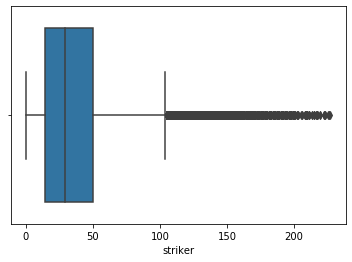

In [26]:
sns.boxplot(data["striker"])

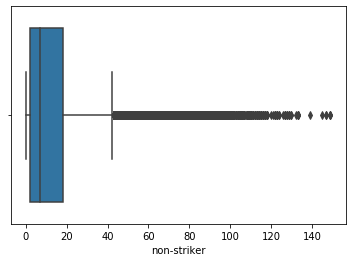

In [27]:
sns.boxplot(data["non-striker"])

In [28]:
index=index=data[data["non-striker"]>100].index
data.drop(index,inplace=True,axis=0)

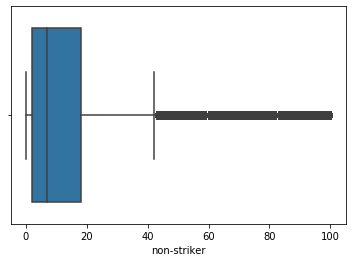

In [29]:
sns.boxplot(data["non-striker"])

# Data Tranformation

**Use “groupby” operation, to find the average number of runs, scored by each country,and represent it on a bar graph.**

In [ ]:
country=data.groupby("bat_team")

In [71]:
country.first()

,mid,date,venue,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
bat_team,,,,,,,,,,,,,,
Afghanistan,363,2009-04-19,Willowmoore Park,Scotland,Noor Ali Zadran,JAR Blain,0,0,0.1,0,0,0,0,295
Asia XI,192,2007-06-06,M Chinnaswamy Stadium,Africa XI,ST Jayasuriya,M Morkel,1,0,0.0,1,0,0,0,317
Australia,10,2006-01-15,"Brisbane Cricket Ground, Woolloongabba",South Africa,AC Gilchrist,SM Pollock,0,1,0.1,0,1,0,0,228
Bangladesh,31,2006-02-20,Shaheed Chandu Stadium,Sri Lanka,Rajin Saleh,PDRL Perera,0,0,0.1,0,0,0,0,118
Bermuda,173,2006-11-27,Sedgars Park,Canada,KL Tucker,H Osinde,0,0,0.1,0,0,0,0,235
Canada,181,2007-02-02,Gymkhana Club Ground,Bermuda,AA Mulla,KAD Hurdle,4,0,0.1,4,0,4,0,162
England,1,2006-06-13,"Civil Service Cricket Club, Stormont",Ireland,ME Trescothick,DT Johnston,0,0,0.1,0,0,0,0,301
Hong Kong,923,2014-05-04,Kinrara Academy Oval,United Arab Emirates,Irfan Ahmed,Mohammad Naveed,1,0,0.0,1,0,0,0,157
India,41,2006-03-28,Feroz Shah Kotla,England,G Gambhir,JM Anderson,1,0,0.1,1,0,1,0,203


In [ ]:
all_teams=df.bat_team.unique()
all_teams


In [73]:
avg_runs=[]
for i in all_teams:
  t=country.get_group(i)
  avg=np.mean(t["total"])
  avg_runs.append(avg)


In [74]:

avg_runs


[267.40873442540004,
 258.1258224745194,
 255.30884134033104,
 275.6533574088703,
 282.91939977206533,
 269.08046755886835,
 233.2364039955605,
 238.38393588141508,
 278.1806680622554,
 207.6656954156954,
 230.53591914777382,
 225.1891891891892,
 183.72115047351807,
 189.38777908343127,
 205.2304761904762,
 200.2617305208782,
 328.3915857605178,
 232.5289815817985,
 227.79555084745763,
 227.62273901808786,
 201.0]

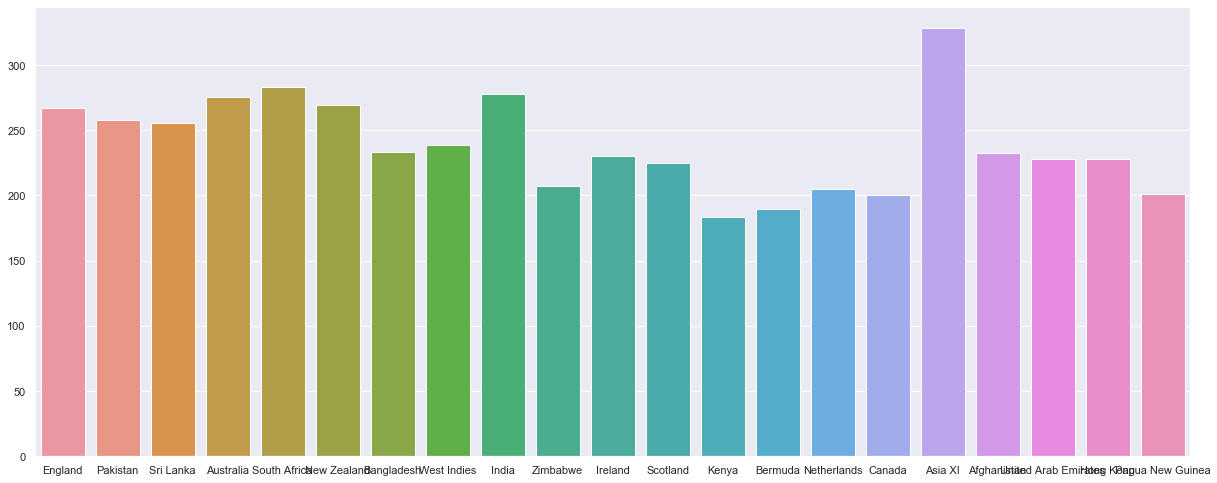

In [75]:
sns.set(rc={'figure.figsize':(20,10)})
sns.barplot(x=country,y=avg_runs)


In [76]:
data.corr()

,mid,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
mid,1.000000,0.036731,-0.023657,0.006076,0.063483,-0.004773,0.060450,0.038389,0.116647
runs,0.036731,1.000000,0.606640,0.933619,0.652177,0.197164,0.588531,0.287586,0.329847
wickets,-0.023657,0.606640,1.000000,0.756556,0.187831,0.460702,0.098652,-0.149173,-0.275170
overs,0.006076,0.933619,0.756556,1.000000,0.507694,0.214642,0.515009,0.228308,0.108849
runs_last_5,0.063483,0.652177,0.187831,0.507694,1.000000,-0.021955,0.563564,0.439409,0.425381
wickets_last_5,-0.004773,0.197164,0.460702,0.214642,-0.021955,1.000000,-0.195583,-0.474601,-0.175534
striker,0.060450,0.588531,0.098652,0.515009,0.563564,-0.195583,1.000000,0.539553,0.365565
non-striker,0.038389,0.287586,-0.149173,0.228308,0.439409,-0.474601,0.539553,1.000000,0.311963
total,0.116647,0.329847,-0.275170,0.108849,0.425381,-0.175534,0.365565,0.311963,1.000000


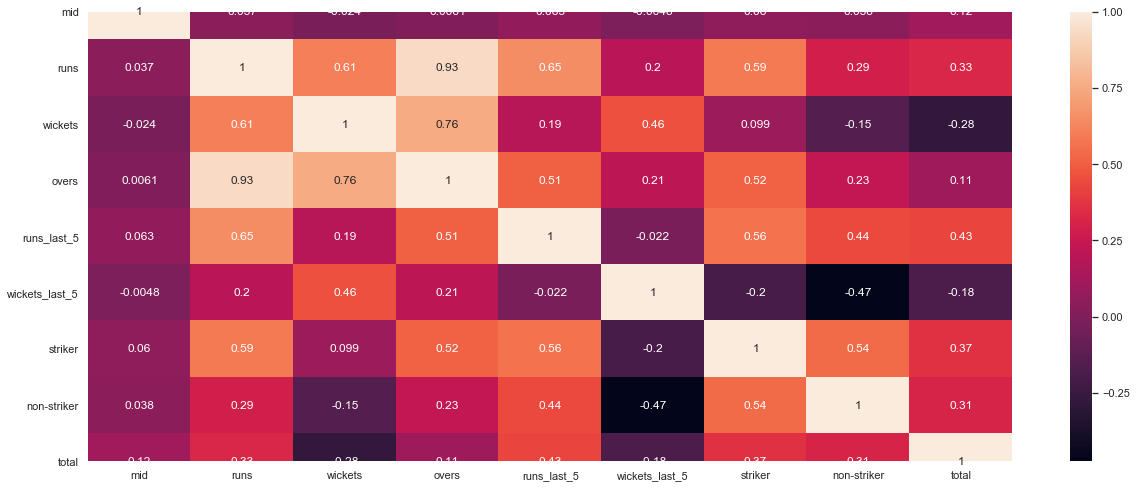

In [77]:
sns.heatmap(data.corr(),annot=True)

we can remove overs and mid from the dataframe and take runs,wickets,runs_last_5,wickets_last_five,striker,non_stricker as our featur variables

In [78]:
data.drop(['mid','overs'],axis=1)

,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,runs_last_5,wickets_last_5,striker,non-striker,total
0,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,0,0,0,0,0,0,301
1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,0,0,0,0,0,0,301
2,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,4,0,4,0,0,0,301
3,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,6,0,6,0,0,0,301
4,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,6,0,6,0,0,0,301
...,...,...,...,...,...,...,...,...,...,...,...,...,...
350894,2017-07-10,Mahinda Rajapaksa International Cricket Stadiu...,Sri Lanka,Zimbabwe,DAS Gunaratne,TL Chatara,201,8,39,0,59,18,203
350895,2017-07-10,Mahinda Rajapaksa International Cricket Stadiu...,Sri Lanka,Zimbabwe,DAS Gunaratne,TL Chatara,201,8,39,0,59,18,203
350896,2017-07-10,Mahinda Rajapaksa International Cricket Stadiu...,Sri Lanka,Zimbabwe,DAS Gunaratne,TL Chatara,201,8,38,0,59,18,203
350897,2017-07-10,Mahinda Rajapaksa International Cricket Stadiu...,Sri Lanka,Zimbabwe,DAS Gunaratne,TL Chatara,202,8,38,0,59,18,203


## testing and training dataset

In [79]:
x=data[['runs','wickets','runs_last_5','wickets_last_5','striker','non-striker']] 
x #independent variables

,runs,wickets,runs_last_5,wickets_last_5,striker,non-striker
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,4,0,4,0,0,0
3,6,0,6,0,0,0
4,6,0,6,0,0,0
...,...,...,...,...,...,...
350894,201,8,39,0,59,18
350895,201,8,39,0,59,18
350896,201,8,38,0,59,18
350897,202,8,38,0,59,18


In [80]:
y=data['total']
y         #dependent variable

0         301
1         301
2         301
3         301
4         301
         ... 
350894    203
350895    203
350896    203
350897    203
350898    203
Name: total, Length: 344058, dtype: int64

creating training and testing data

In [81]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
y_train

258045    180
282725    267
282551    267
64176     137
197430    236
         ... 
125085    245
310263    271
155321    279
120348    200
311848    188
Name: total, Length: 275246, dtype: int64

# linear Regression model

In [38]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit (x_train, y_train)
# The coefficients
print ('Coefficients: ', regr.coef_)
print("intercept",regr.intercept_)

Coefficients:  [  0.59141    -21.42261848   0.72767746  -0.3633703   -0.09917988
  -0.19798247]
intercept 239.80840526725277


In [39]:
accuracy = regr.score(x_test,y_test)


In [40]:
print(accuracy*100,'%')

47.60864001376864 %


# Decision Tree regression

In [41]:
from sklearn.tree import DecisionTreeClassifier
score_tree = DecisionTreeClassifier(criterion="entropy")
score_tree# it shows the default parameters

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [42]:
score_tree.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [43]:
predTree = score_tree.predict(x_test)

In [44]:
from sklearn import metrics

print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  0.7211242225193281
